In [46]:

from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import random

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [22]:
image_directory = './data/training.tif'
mask_directory = './data/training_groundtruth.tif'

In [19]:
with Image.open(image_directory) as img:
    for i in range(img.n_frames):
        img.seek(1)
        img.save(f'./data/images/image_{i + 1}.png', 'PNG')

In [24]:
with Image.open(mask_directory) as img:
    for i in range(img.n_frames):
        img.seek(1)
        img.save(f'./data/masks/mask_{i + 1}.png', 'PNG')

In [30]:
image_names = glob.glob("./data/images/*.png")
mask_names = glob.glob("./data/masks/*.png")

In [31]:
mask_names

['./data/masks\\mask_1.png',
 './data/masks\\mask_10.png',
 './data/masks\\mask_100.png',
 './data/masks\\mask_101.png',
 './data/masks\\mask_102.png',
 './data/masks\\mask_103.png',
 './data/masks\\mask_104.png',
 './data/masks\\mask_105.png',
 './data/masks\\mask_106.png',
 './data/masks\\mask_107.png',
 './data/masks\\mask_108.png',
 './data/masks\\mask_109.png',
 './data/masks\\mask_11.png',
 './data/masks\\mask_110.png',
 './data/masks\\mask_111.png',
 './data/masks\\mask_112.png',
 './data/masks\\mask_113.png',
 './data/masks\\mask_114.png',
 './data/masks\\mask_115.png',
 './data/masks\\mask_116.png',
 './data/masks\\mask_117.png',
 './data/masks\\mask_118.png',
 './data/masks\\mask_119.png',
 './data/masks\\mask_12.png',
 './data/masks\\mask_120.png',
 './data/masks\\mask_121.png',
 './data/masks\\mask_122.png',
 './data/masks\\mask_123.png',
 './data/masks\\mask_124.png',
 './data/masks\\mask_125.png',
 './data/masks\\mask_126.png',
 './data/masks\\mask_127.png',
 './data/mask

In [36]:
image_names.sort()

In [38]:
mask_names.sort()

In [40]:
subset_length = 100

In [42]:
image_names = image_names[:subset_length]
mask_names = mask_names[:subset_length]

In [43]:
img = cv2.imread(image_names[0])
img.shape

(768, 1024, 3)

In [44]:
mask = cv2.imread(mask_names[0])
mask.shape

(768, 1024, 3)

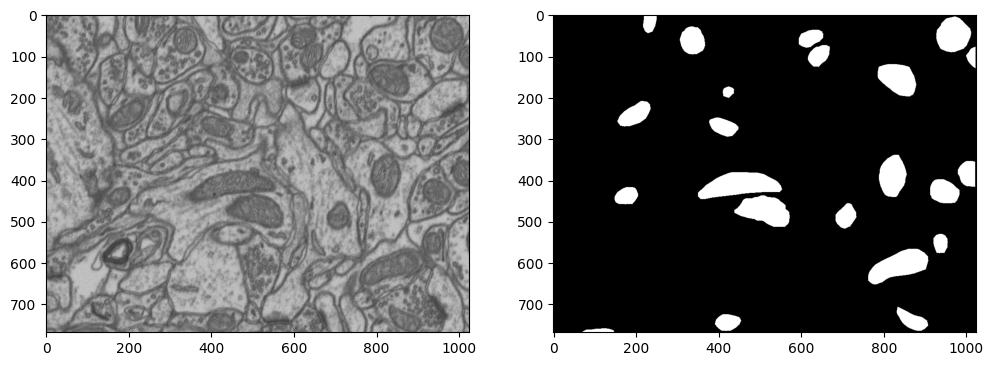

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.show()

In [61]:
# resize images
def resize_images(image_names):
    resized_images = []
    for image in image_names:
        img = cv2.imread(image)
        resized = cv2.resize(img,(256,256))
        resized_images.append(resized)
    return resized_images    

In [71]:
images = resize_images(image_names)
masks = resize_images(mask_names)

In [102]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [103]:
img = tf.cast(tf.expand_dims(images[0], 0), tf.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


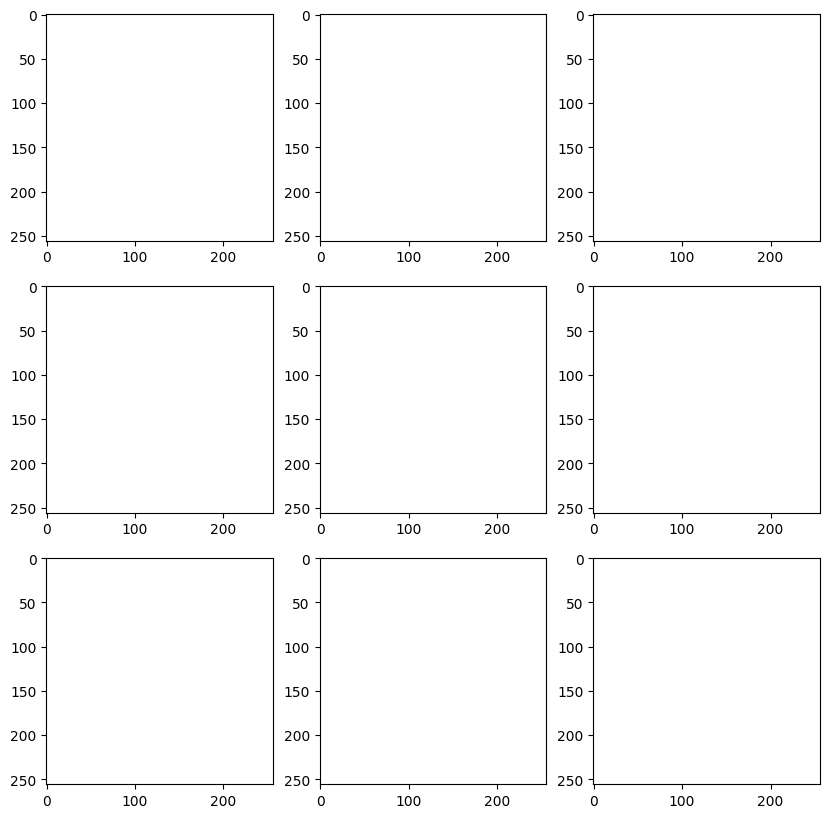

In [104]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(img)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])

In [105]:
res = data_augmentation(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


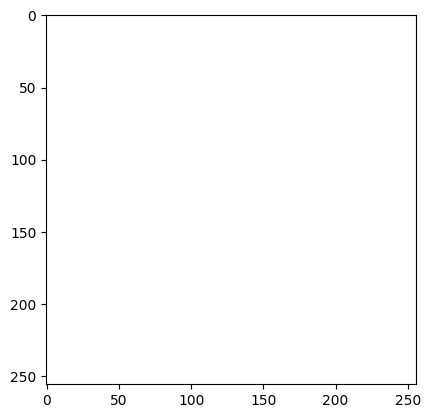

In [109]:
plt.imshow(res.numpy()[0])

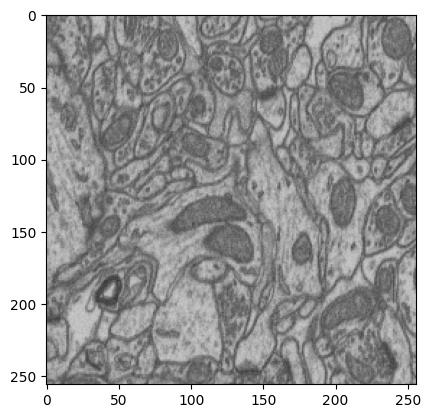

In [110]:
plt.imshow(images[0])

In [112]:
images[0]

array([[[117, 117, 117],
        [108, 108, 108],
        [129, 129, 129],
        ...,
        [173, 173, 173],
        [188, 188, 188],
        [191, 191, 191]],

       [[115, 115, 115],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [166, 166, 166],
        [176, 176, 176],
        [186, 186, 186]],

       [[ 97,  97,  97],
        [117, 117, 117],
        [110, 110, 110],
        ...,
        [164, 164, 164],
        [181, 181, 181],
        [188, 188, 188]],

       ...,

       [[107, 107, 107],
        [108, 108, 108],
        [ 90,  90,  90],
        ...,
        [114, 114, 114],
        [155, 155, 155],
        [165, 165, 165]],

       [[103, 103, 103],
        [107, 107, 107],
        [117, 117, 117],
        ...,
        [141, 141, 141],
        [160, 160, 160],
        [171, 171, 171]],

       [[132, 132, 132],
        [139, 139, 139],
        [140, 140, 140],
        ...,
        [111, 111, 111],
        [126, 126, 126],
        [142, 142, 142]]

In [113]:
res.numpy()[0]

array([[[ 99.97421 ,  99.97421 ,  99.97421 ],
        [124.09979 , 124.09979 , 124.09979 ],
        [146.30713 , 146.30713 , 146.30713 ],
        ...,
        [150.478   , 150.478   , 150.478   ],
        [135.65906 , 135.65906 , 135.65906 ],
        [ 98.6635  ,  98.6635  ,  98.6635  ]],

       [[104.49887 , 104.49887 , 104.49887 ],
        [145.31456 , 145.31456 , 145.31456 ],
        [152.65761 , 152.65761 , 152.65761 ],
        ...,
        [150.5858  , 150.5858  , 150.5858  ],
        [138.4399  , 138.4399  , 138.4399  ],
        [114.734055, 114.734055, 114.734055]],

       [[111.86173 , 111.86173 , 111.86173 ],
        [136.38695 , 136.38695 , 136.38695 ],
        [132.94594 , 132.94594 , 132.94594 ],
        ...,
        [148.68402 , 148.68402 , 148.68402 ],
        [127.337875, 127.337875, 127.337875],
        [114.90412 , 114.90412 , 114.90412 ]],

       ...,

       [[155.69623 , 155.69623 , 155.69623 ],
        [165.19606 , 165.19606 , 165.19606 ],
        [151.33633 , 1